In [1]:
# ikmportações necessarias

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [ ]:
# importando dados
df = pd.read_csv('./data/AirPassengers.csv', 
                 sep=',',
                 parse_dates=True,
                 index_col=0)

# conversão para uso no keras
data = df.values
data = data.astype('float32')

# semente aleatória para conservar os mesmos valores nos testes
np.random.seed(3)

# viz dos valores
data[0:3]

In [ ]:
# separação treino e teste

train = data[0:125, :]
test  = data[125:, :]

In [ ]:
# função de preparação dos dados

def prep_data(data, lags=1):
    
    X, y = [],[]
    
    for linha in range(len(data) - lags - 1 ):
        a = data[ linha :( linha + lags ), 0 ]
        X.append( a )
        y.append( data [ linha + lags, 0 ])
    
    return np.array(X), np.array(y) 


In [ ]:
# preparando os dados

lags = 1 

X_train, y_train = prep_data(train, lags)
X_test, y_test = prep_data(test, lags)
y_true = y_test

In [ ]:
# visualização grafica

plt.plot(y_test, label='Dados Reais | y or t+1 ', color='blue')
plt.plot(X_test, label='Dados Passados | x or t ', color='orange')
plt.legend(loc='upper left')
plt.title('Periodo de observação')
plt.show()

In [ ]:
# criando e treinando a rede neural 

model_1 = Sequential()
model_1.add(Dense(3, input_dim=lags, activation='relu'))
model_1.add(Dense(1))
model_1.compile(loss='mean_squared_error', optimizer='adam')
model_1.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

In [ ]:
# avaliação

train_score = model_1.evaluate(X_train, y_train, verbose=0)
print(f'Pontuação de Treino : {train_score:.2f} MSE ({math.sqrt(train_score):.2f} RMSE)')

test_score = model_1.evaluate(X_test, y_test, verbose=0)
print(f'Pontuação de Teste : {test_score:.2f} MSE ({math.sqrt(test_score):.2f} RMSE)')

In [ ]:
# previsões

train_predict = model_1.predict(X_train)
test_predict = model_1.predict(X_test)

In [ ]:
# visualização grafica

# configuração dos dados de treino
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len( train_predict ) + lags, : ] = train_predict

# configuração dos dados de teste
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len( train_predict ) + ( lags * 2 ) + 1: len(data) -1, :] = test_predict

# configuração do grafico
plt.figure(figsize=(16,5))
plt.plot(data, label='Observado', color='blue')
plt.plot(train_predict_plot, label='Previsão dados de treino', color='red', alpha=0.5)
plt.plot(test_predict_plot, label='previsão dados de teste', color='green')
plt.legend(loc='best')
plt.title('Redes Neurais Artificiais')

plt.show()

In [ ]:
# uso de LSTM

In [ ]:
# importando os dados

df=pd.read_csv('./data/international-airline-passengers.csv',
               usecols=[1],
               skipfooter=3,
               engine='python')

# visualização dados
df.head(3)

In [ ]:
# # grafico dos dados

plt.figure(figsize=(15,5))
plt.plot(df, label='Passageiros de linhas Aéreas')
plt.xlabel('Meses')
plt.ylabel('Qt/K Passageiros')
plt.title('Passageiros mensais de 1949 até 1960')
plt.legend()
plt.show()

In [ ]:
# transformação dos dados para o formato do keras

data_raw = df.values.astype('float32')

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data_raw)

In [ ]:
# separação dos dados

TRAIN_SIZE = 0.75

train_size = int( len(data_scaled) * TRAIN_SIZE )
test_size  = len(data_scaled) - train_size

train, test = data_scaled[ 0: train_size, : ], data_scaled[ train_size : len(data_scaled), : ]

# tamanho dos dados
print(len(train))
print(len(test))

In [ ]:
# preparando os dados

lags = 1 

train_X, train_Y = prep_data(train, lags)
test_X, test_Y = prep_data(test, lags)

In [ ]:
# visualização grafica

plt.plot(y_test, label='Dados Reais | y or t+1 ', color='blue')
plt.plot(X_test, label='Dados Passados | x or t ', color='orange')
plt.legend(loc='upper left')
plt.title('Periodo de observação')
plt.show()

In [ ]:
# tamanho dos dados antes da trasnformação

X_train.shape, X_test.shape

In [ ]:
# reshape dos dados e visualização

train_X = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
test_X  = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# visualização dos dados após transformação
train_X.shape, test_X.shape

In [ ]:
y_train.shape

In [ ]:
# criando LSTM

windows_size = 1

model_2 = Sequential()

model_2.add(LSTM(4, input_shape = (1, windows_size)))
model_2.add(Dense(1))

model_2.compile(loss='mean_squared_error', optimizer='adam')
model_2.fit(train_X,
            train_Y, 
            epochs=100, 
            batch_size=1, 
            verbose=True)

In [ ]:
# LSTM para dados do mercado financeiro

In [50]:
# importação dos dados financeiros

df = pd.read_csv('./data/all-stocks-5yr.csv')
df.head(3)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL


In [51]:
# quantidade de empresas no dataset

comp = df.Name.unique()
len(comp)

505

In [52]:
# selecionando uma empresa

z = df.loc[df['Name']=='ZTS']
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 617781 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [53]:
# criação de um array com preços de fechamento 

train = z.iloc[:, 4:5].values
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08995937],
       [0.09402205],
       [0.10330818],
       ...,
       [0.8788934 ],
       [0.86805959],
       [0.87947379]])

In [54]:
# tranformação para rede neural

x_train = []
y_train = []
timestamp = 45
length = len(train)

for i in range(timestamp, length):
    
    x_train.append(train_scaled[ i - timestamp : i, 0 ])
    y_train.append(train_scaled[ i, 0 ])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [55]:
# visualização dos valores após a transformação

print(x_train[0])
print('\n')
print(y_train[0])

[0.08995937 0.09402205 0.10330818 0.09963242 0.09421552 0.10795125
 0.10524279 0.08357516 0.08047978 0.08106017 0.07100019 0.07041981
 0.07583672 0.09769781 0.11994583 0.11510931 0.11394854 0.10543625
 0.11917199 0.11007932 0.11182047 0.10485587 0.10833817 0.12071967
 0.09750435 0.08589669 0.08512285 0.09885858 0.09808474 0.0913136
 0.07854517 0.07951248 0.08396208 0.09673051 0.08106017 0.08028632
 0.0798994  0.06655059 0.06887212 0.08744438 0.09750435 0.09189398
 0.09208744 0.09344167 0.07428903]


0.0930547494679822


In [56]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1214, 45, 1)

In [75]:
model_3 = Sequential()

model_3.add(LSTM(units=120, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_3.add(Dropout(0.2))

model_3.add(LSTM(units=120, return_sequences=True))
model_3.add(Dropout(0.2))

model_3.add(LSTM(units=120, return_sequences=True))
model_3.add(Dropout(0.2))

model_3.add(LSTM(units=120, return_sequences=False))
model_3.add(Dropout(0.2))

model_3.add(Dense(units=1))

model_3.compile(optimizer='adam', loss='mean_squared_error')

model_3.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/2
38/38 [==============================] - 3s 92ms/step - loss: 0.0164
Epoch 2/2
38/38 [==============================] - 3s 91ms/step - loss: 0.0023


In [58]:
# teste com outras ações

test_set = df.loc[df['Name']=='BA']
test_set = test_set.loc[:,test_set.columns=='close']

In [59]:
# preparação dos dados

y_test = test_set.iloc[timestamp: , 0].values

In [60]:
# scaler dos dados

close_price = test_set.iloc[ :, 0:].values
close_price_scaled = scaler.transform(close_price)

In [61]:
# tranformação para o formato esperado da rede neural

x_test = []
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(close_price_scaled[i - timestamp : i, 0])

x_test = np.array(x_test)
x_test.shape

(1214, 45)

In [62]:
# transformação dos dados para previsão e visualização

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

y_pred = model_3.predict(x_test)

previsao_price = scaler.inverse_transform(y_pred)

(1214, 45, 1)

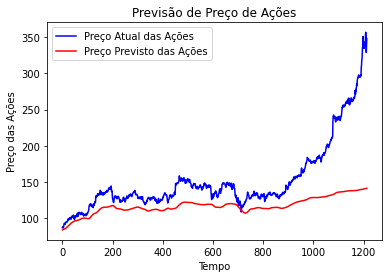

In [78]:
# grafico das previsões

plt.plot(y_test, color='blue', label='Preço Atual das Ações')
plt.plot(previsao_price, color='red', label='Preço Previsto das Ações')
plt.title('Previsão de Preço de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preço das Ações')
plt.legend()
plt.show()